goods_bay is an online store company I work for and needs to segment its ccustomers in order to make better business decisions. It would be great if I as their junior data scientist  could somehow create a model that allows goods_bay  effectively segment their customers.
I decide that using RFM analysis and K-Means might be good paths to solve this problem!
The data.csv data set provided by goods_bay contains the following features:

* 'InvoiceNo': unique number generated issuing an invoice to a client
* 'StockCode': an abbreviation that identifies a particular security on a stock-quotation machine
* 'Description': Description of goods bought by customer
* 'Quantity': Quantity of goods bought by customer
* 'InvoiceDate': Date of transaction
* 'UnitPrice': Unit price of goods
* 'CustomerID':  ID of the customer
* 'Country': Country of customer


In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import datetime as dt

In [2]:
df = pd.read_csv('data.csv',encoding="ISO-8859-1")

In [3]:
df.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
148933,549261,22729,ALARM CLOCK BAKELIKE ORANGE,4,4/7/2011 12:35,3.75,14903.0,United Kingdom
311148,564226,23231,WRAP VINTAGE DOILY,25,8/24/2011 10:13,0.42,12523.0,France
106743,545340,48129,DOORMAT TOPIARY,2,3/2/2011 8:41,7.95,15416.0,United Kingdom
47138,C540384,22384,LUNCH BAG PINK POLKADOT,-1,1/6/2011 17:48,1.65,14961.0,United Kingdom
472101,576665,23210,WHITE ROCKING HORSE HAND PAINTED,5,11/16/2011 11:46,1.25,17841.0,United Kingdom


In [4]:
# I like my column names in lower case and I ensure that any space between words are replace with '_'
df.columns = df.columns.str.replace('\s+','_').str.lower().str.strip()

In [5]:
df.shape

(541909, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   invoiceno    541909 non-null  object 
 1   stockcode    541909 non-null  object 
 2   description  540455 non-null  object 
 3   quantity     541909 non-null  int64  
 4   invoicedate  541909 non-null  object 
 5   unitprice    541909 non-null  float64
 6   customerid   406829 non-null  float64
 7   country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
# drop the null values
df.dropna(inplace=True)

In [8]:
# we also remove duplicated records
df = df[~df.duplicated()]

In [9]:
df.describe()

,quantity,unitprice,customerid
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


In [10]:
# quantity has negative values, we remove those
df = df[df['quantity'] > 0]

In [11]:
# there are outliers in 'quantity' so we remove them
from sklearn.ensemble import IsolationForest
model = IsolationForest(n_estimators=50, max_samples='auto', max_features=1.0, contamination=float(0.1)).fit(df[['quantity']])
# df['scores'] = model.decision_function(df[['price']])
df['anomaly'] = model.predict(df[['quantity']])
df = df[df['anomaly'] != -1]

In [12]:
# there are outliers in 'unitprice' so we remove them
from sklearn.ensemble import IsolationForest
model = IsolationForest(n_estimators=50, max_samples='auto', max_features=1.0, contamination=float(0.1)).fit(df[['unitprice']])
# df['scores'] = model.decision_function(df[['price']])
df['anomaly'] = model.predict(df[['unitprice']])
df = df[df['anomaly'] != -1]
# sns.distplot(df['quantity'])

#### To effectively segment this data, RFM analysis needs to be carried out, hence we perform feature engineering on the dataset

In [13]:
# we get the total price by multiplying quantity of goods bought by the unit price
df['totalprice'] = df['quantity'] * df['unitprice']

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 325570 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   invoiceno    325570 non-null  object 
 1   stockcode    325570 non-null  object 
 2   description  325570 non-null  object 
 3   quantity     325570 non-null  int64  
 4   invoicedate  325570 non-null  object 
 5   unitprice    325570 non-null  float64
 6   customerid   325570 non-null  float64
 7   country      325570 non-null  object 
 8   anomaly      325570 non-null  int32  
 9   totalprice   325570 non-null  float64
dtypes: float64(3), int32(1), int64(1), object(5)
memory usage: 26.1+ MB


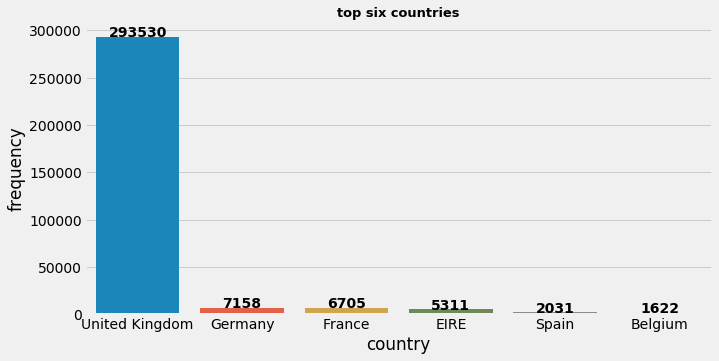

In [15]:
# we view the 'country' column
country_df = pd.DataFrame(df['country'].value_counts()).reset_index()
country_df.columns = ['country', 'frequency']

plt.figure(figsize=(10,5))
sns.barplot(data = country_df.head(6), x='country', y='frequency')
plt.title('top six countries',weight='bold',fontsize=13)
for i,j in enumerate(df['country'].value_counts().head(6)):
    plt.text(i,j,j,ha='center',weight='bold')

In [16]:
# convert to datetime format
df['invoicedate'] = pd.to_datetime(df['invoicedate'])

# create a date column with  dates only
df['date'] = [each_date.date() for each_date in df['invoicedate']]

In [17]:
df.sample(2)

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,anomaly,totalprice,date
291819,562519,22469,HEART OF WICKER SMALL,1,2011-08-05 12:37:00,1.65,16764.0,United Kingdom,1,1.65,2011-08-05
177844,552185,84997D,CHILDRENS CUTLERY POLKADOT PINK,8,2011-05-06 13:52:00,4.15,12921.0,United Kingdom,1,33.20,2011-05-06


In [18]:
print(f"min date: {df['date'].min()}")
print(f"max date: {df['date'].max()}")

min date: 2010-12-01
max date: 2011-12-09


In [19]:
# we set the current date to the end of the year 2011
current_date = dt.datetime(2011,12,31).strftime("%Y-%m-%d")

In [20]:
# we perform groupby, subtracting the date from current date to get recency
df_rfm = df.groupby('customerid').agg({'invoicedate': lambda date: (pd.to_datetime(current_date) - pd.to_datetime(date.max())).days,
                                      'invoiceno': lambda inv_num: len(inv_num),
                                      'totalprice': lambda price: price.sum()})

In [21]:
df_rfm.head()

,invoicedate,invoiceno,totalprice
customerid,,,
12347.0,23,157,3194.11
12348.0,339,5,73.20
12349.0,39,61,1142.61
12350.0,331,16,294.40
12352.0,57,66,1154.14


In [22]:
df_rfm.columns = ['recency','frequency','monetary']
df_rfm.sample(2)

,recency,frequency,monetary
customerid,,,
13522.0,51,5,125.80
12700.0,28,238,3912.68


(0, 17500)

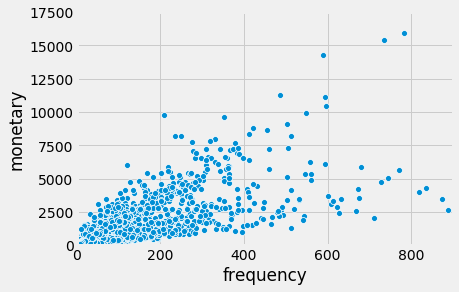

In [23]:
sns.scatterplot(data=df_rfm, x='frequency', y='monetary')
plt.xlim(0,900)
plt.ylim(0,17500)

### from the above plot, the more frequent the customer, the more the likelihood of the customer to spend more

(0, 500)

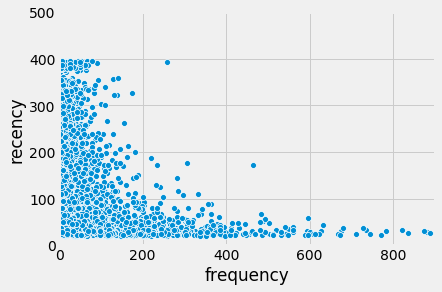

In [24]:
sns.scatterplot(data=df_rfm, x='frequency', y='recency')
plt.xlim(0,900)
plt.ylim(0,500)

(0, 20000)

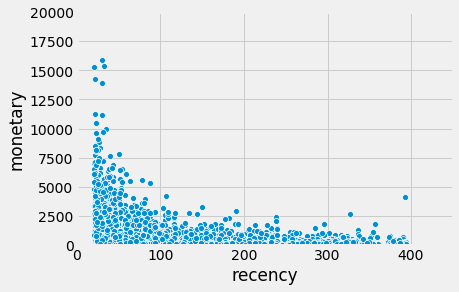

In [25]:
sns.scatterplot(data=df_rfm, x='recency', y='monetary')
plt.xlim(0,450)
plt.ylim(0,20000)

### from the above plot, the more recent the customers, the more they spend

In [26]:
# we create a quartile for the values into four segments
df_rfm['R'] = pd.qcut(df_rfm['recency'],4,range(1,5))
df_rfm['F'] = pd.qcut(df_rfm['frequency'],4,range(4,0,-1))
df_rfm['M'] = pd.qcut(df_rfm['monetary'],4,range(4,0,-1))
df_rfm.sample(10)

,recency,frequency,monetary,R,F,M
customerid,,,,,,
15492.0,49,31,555.74,2,3,2
15811.0,43,118,1964.54,2,1,1
16960.0,59,100,497.10,2,1,2
13136.0,77,107,2038.47,3,1,1
15417.0,106,28,508.80,3,3,2
15066.0,74,32,580.45,3,3,2
13669.0,71,6,160.20,2,4,4
15528.0,275,24,161.38,4,3,4
14589.0,392,3,39.75,4,4,4


In [27]:
# concatenate the values of 'R', 'F', 'M'
df_rfm['RFM_segment'] = df_rfm[['R','F','M']].apply(lambda each_val: ''.join(each_val.values.astype(str)),axis=1)
# we sum the values of 'R', 'F', 'M'
df_rfm['RFM_score'] = df_rfm[['R','F','M']].sum(axis=1).astype('int')
df_rfm.sample(5)

,recency,frequency,monetary,R,F,M,RFM_segment,RFM_score
customerid,,,,,,,,
18230.0,30,70,1667.08,1,2,1,121,4
16048.0,394,8,256.44,4,4,3,443,11
16634.0,393,6,119.40,4,4,4,444,12
13798.0,38,28,117.55,1,3,4,134,8
14272.0,94,23,333.92,3,3,3,333,9


In [28]:
df_rfm = df_rfm.reset_index()

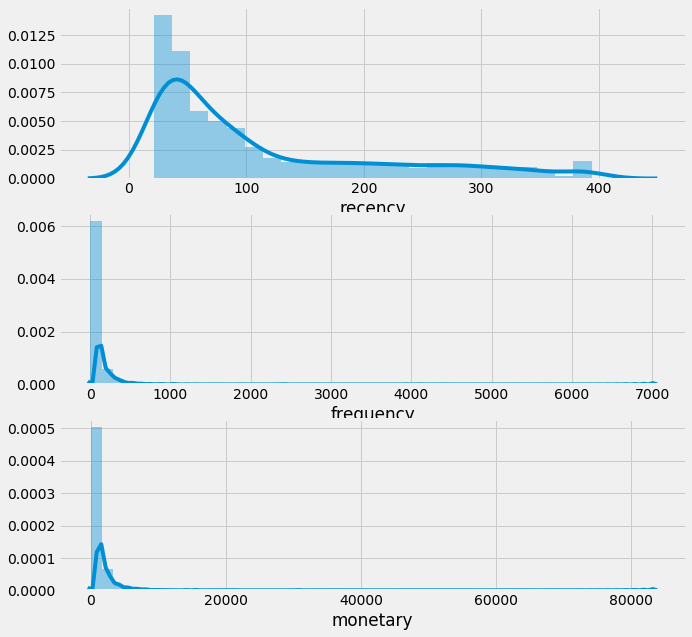

In [29]:
plt.figure(figsize=(10,10))

plt.subplot(3,1,1)
sns.distplot(df_rfm['recency'])

plt.subplot(3,1,2)
sns.distplot(df_rfm['frequency'])

plt.subplot(3,1,3)
sns.distplot(df_rfm['monetary'])

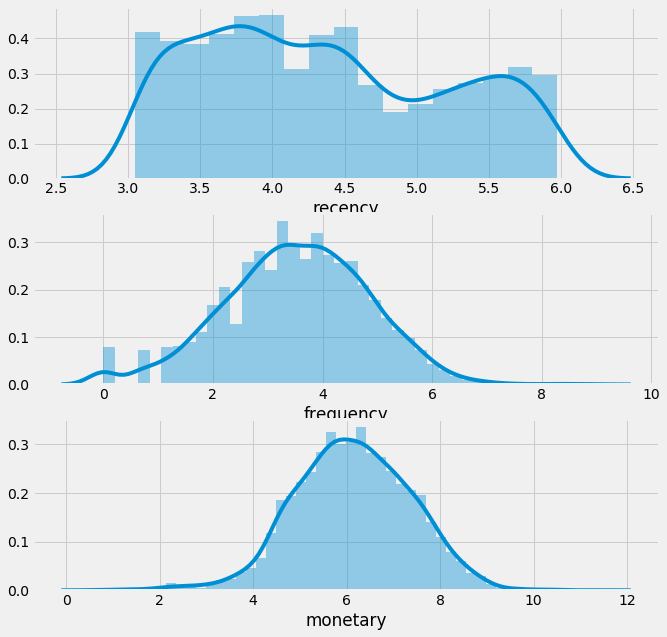

In [30]:
# we take their log values
df_rfm_log = df_rfm.copy()
df_rfm_log['recency'] = np.log(df_rfm_log['recency'])
df_rfm_log['frequency'] = np.log(df_rfm_log['frequency'])
df_rfm_log['monetary'] = np.log(df_rfm_log['monetary'])

plt.figure(figsize=(10,10))

plt.subplot(3,1,1)
sns.distplot(df_rfm_log['recency'])

plt.subplot(3,1,2)
sns.distplot(df_rfm_log['frequency'])

plt.subplot(3,1,3)
sns.distplot(df_rfm_log['monetary'])

In [31]:
# create another dataframe 'X' for further analysis
X = df_rfm_log[['recency','frequency','monetary']]

In [32]:
# scale the values
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X)
X_scaled = sc.transform(X)

X_scaled = pd.DataFrame(X_scaled, columns = X.columns)

In [33]:
X_scaled.head()

,recency,frequency,monetary
0,-1.444453,1.168506,1.555629
1,1.719255,-1.451242,-1.477078
2,-0.823510,0.449976,0.729964
3,1.691173,-0.567189,-0.359255
4,-0.377276,0.509853,0.738028


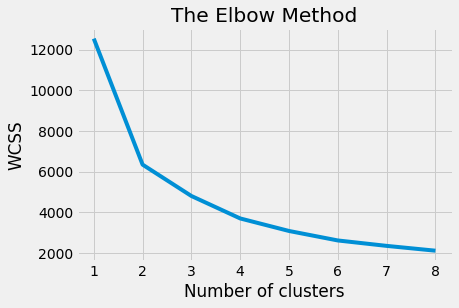

In [34]:
# we use the elbow method to fid the best number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 9):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 9), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [35]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
kmeans.fit(X_scaled)
identified_clusters = kmeans.fit_predict(X_scaled)
X['cluster'] = identified_clusters

C:\Users\Charles\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [36]:
# we use TSNE to enable visualisation as it reduces the number of dimensions to two
X__ = X[['recency', 'frequency', 'monetary']]
from sklearn.manifold import TSNE
model = TSNE(random_state = 42)
X_viz = model.fit_transform(X__)

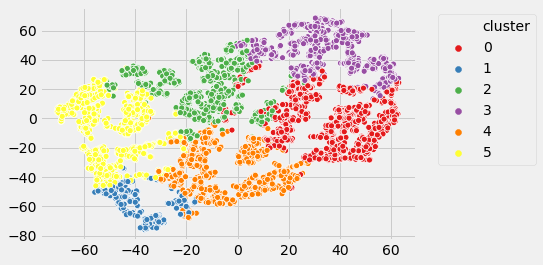

In [37]:
sns.scatterplot(X_viz[:,0],X_viz[:,1],hue=X['cluster'],palette='Set1')
plt.legend(bbox_to_anchor=(1.04,1), loc=(0))

In [38]:
# we view each of the clusters to know their segments
df_rfm['cluster'] = identified_clusters
# df_rfm[df_rfm['cluster']==0][['RFM_segment','recency','frequency','monetary']].sample(5)
# df_rfm[df_rfm['cluster']==1][['RFM_segment','recency','frequency','monetary']].sample(5)
# df_rfm[df_rfm['cluster']==2][['RFM_segment','recency','frequency','monetary']].sample(5)
# df_rfm[df_rfm['cluster']==3][['RFM_segment','recency','frequency','monetary']].sample(5)
# df_rfm[df_rfm['cluster']==4][['RFM_segment','recency','frequency','monetary']].sample(5)
df_rfm[df_rfm['cluster']==5][['RFM_segment','recency','frequency','monetary']].sample(5)

,RFM_segment,recency,frequency,monetary
1152,432,329,28,510.78
346,444,385,11,197.00
170,433,282,18,352.05
3391,444,268,14,115.42
3515,443,323,9,215.82


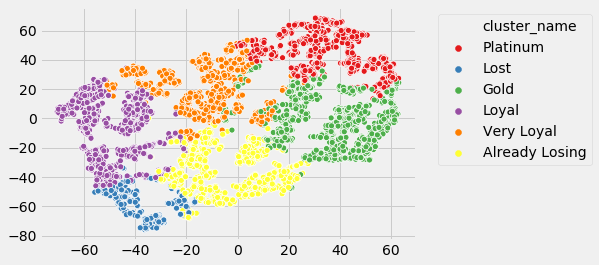

In [55]:
# now we visualise with the appropriate segment name
df_rfm['cluster'] = identified_clusters
df_rfm['cluster_name'] = X['cluster'].map({0: "Gold",
                                      1: "Lost",
                                      2: "Very Loyal",
                                      3: "Platinum",
                                      4: "Already Losing",
                                      5: "Loyal"})
sns.scatterplot(X_viz[:,0],X_viz[:,1],hue=df_rfm['cluster_name'],palette='Set1')
plt.legend(bbox_to_anchor=(1.04,1), loc=(0))

### the best customers are charaterised by "low recency", "high recency", and "high monetary value"

In [40]:
pd.DataFrame({"Customer Segment": ["Platinum","Already Losing","Lost","Very Loyal","Loyal","Gold"],
             "Segment Characteristics": ["Low recency, High frequency, High monetary value",
                                        "High recency, Low frequency, Low monetary value",
                                        "High recency, Very low frequency, Very low monetary value",
                                        "Moderate recency, Moderate frequency, Moderate monetary value",
                                        "Low recency, Very low frequency, Low monetary value",
                                        "Low recency, Moderate frequency, Moderate monetary value"]})

,Customer Segment,Segment Characteristics
0,Platinum,"Low recency, High frequency, High monetary value"
1,Already Losing,"High recency, Low frequency, Low monetary value"
2,Lost,"High recency, Very low frequency, Very low mon..."
3,Very Loyal,"Moderate recency, Moderate frequency, Moderate..."
4,Loyal,"Low recency, Very low frequency, Low monetary ..."
5,Gold,"Low recency, Moderate frequency, Moderate mone..."
